In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('/Users/madisonchristiansen/Desktop/us_retail_sales.csv')   
df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
25,2017,416081,415503,414620,416889,414540,416505,416744.0,417179.0,426501.0,426933.0,431158.0,433282.0
26,2018,432148,434106,433232,435610,439996,438191,440703.0,439278.0,438985.0,444038.0,445242.0,434803.0
27,2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
29,2021,520162,504458,559871,562269,548987,550782,NaN,NaN,NaN,NaN,NaN,NaN


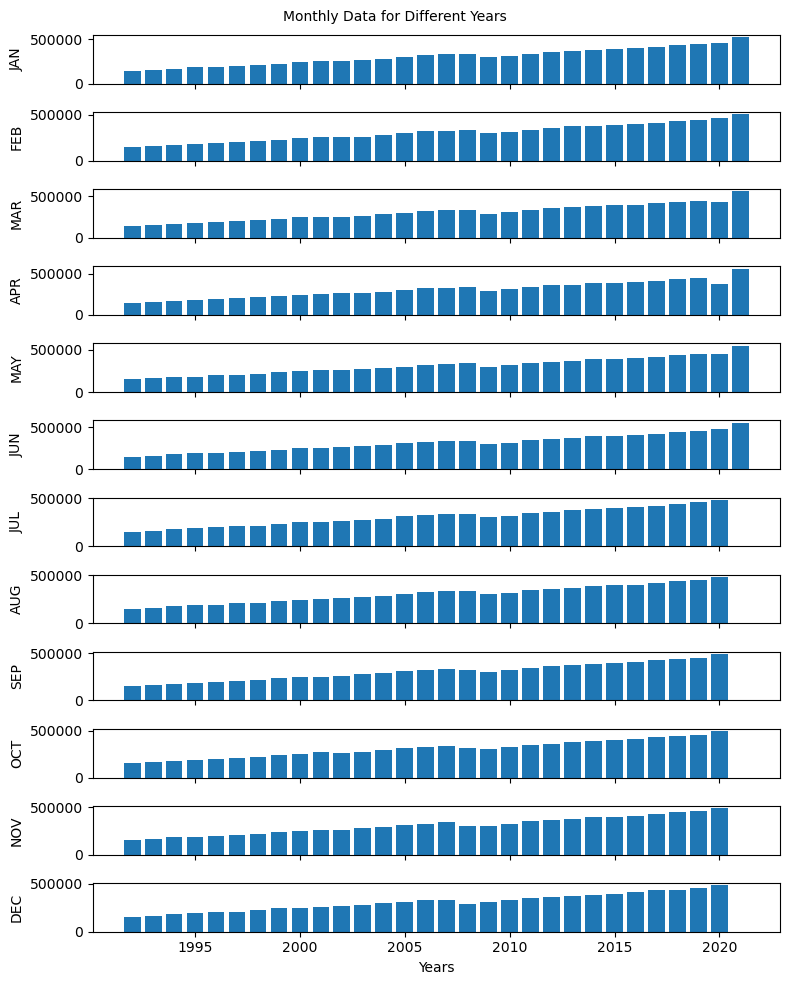

In [18]:
# Graph - Plot the data with proper labeling and make some observations on the graph

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
fig, axes = plt.subplots(len(months), 1, figsize=(8, 10), sharex=True)

# Iterate through each month and create bar plots
for i, month in enumerate(months):
    axes[i].bar(df['YEAR'], df[month])
    axes[i].set_ylabel(month)

plt.suptitle('Monthly Data for Different Years', fontsize=10)
plt.xlabel('Years')
plt.tight_layout()
plt.show()

### When looking at the graphs for each month you can see that throughout the years all sales have increased as the years increased with 2020 being the highest sales of every month.

In [35]:
# Split this data into a training and test set - Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
X = np.array(df['YEAR']).reshape(-1, 1)  ## July 2020 – June 2021
y = np.array(df['JUL'])  ## rest as training
## Remove Nans
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=12, shuffle=False)

In [36]:
# Use the training set to build a predictive model for the monthly retail sales. - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to predict the monthly retail sales on the last year of data.
y_test_pred = model.predict(X_test) 

# Report the RMSE of the model predictions on the test set.
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on Test Data:", rmse_test) ## performance evaluation

RMSE on Test Data: 31592.529431273222
